<a href="https://colab.research.google.com/github/bgohrani/ML_Projects/blob/main/Classification_Models_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
import keras

#Importing essential Libraries

# 1. Loading Data

In [ ]:
(X_train, Y_train) , (X_test, Y_test) = keras.datasets.mnist.load_data()  

#Loading MNIST dataset from Tensorflow Keras

In [ ]:
X_train_reshaped = X_train.reshape(X_train.shape[0],-1)
X_test_reshaped = X_test.reshape(X_test.shape[0],-1)

#The original shape of the Dataset is (60,000,28,28) and we change it to (60,000,784)

# 2. Binary Classification

In [ ]:
Y_train_5 = (Y_train == 5)
Y_test_5 = (Y_test == 5)

#We will first build a linear classifier to detect images as 5s or non-5s

In [ ]:
classifier_model_SGD = SGDClassifier()
classifier_model_SGD.fit(X_train_reshaped, Y_train_5)

#We train a binary classified with Stochastic Gradient Descent

SGDClassifier()

In [ ]:
accuracy_k_folds = cross_val_score(classifier_model_SGD, X_train_reshaped, Y_train_5, cv =3, scoring='accuracy')
print(accuracy_k_folds)

#To observe the true performance of our model, we divide our training set into three
#We train with combinations of 2 sets and then test it on the 3rd set

[0.9503  0.9381  0.96285]


In [ ]:
Y_train_pred = cross_val_predict(classifier_model_SGD, X_train_reshaped, Y_train_5, cv =3)

#We can get the predictions over all the three parts using cross_val_predict

# 3. Metrics

In [ ]:
conf_matrix = confusion_matrix(Y_train_5,Y_train_pred)
print(conf_matrix)
precision = precision_score(Y_train_5,Y_train_pred)
recall = recall_score(Y_train_5,Y_train_pred)
print(precision, recall)

#We can create a confusion matrix for this model, that shows the limitations of our model
#Using precision score and recall score we can calculate precision and recall 
#Precision is the percentage of total positives that are correct
#Recall is the percentage of actual positives that are correctly identified by the model

[[52924  1655]
 [  837  4584]]
0.7347331303093444 0.8456004427227449


In [ ]:
Y_scores = cross_val_predict(classifier_model_SGD, X_train_reshaped, Y_train_5, cv = 3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(Y_train_5, Y_scores)

#We can plot the curve of precision/recall against the thresholds of the model to see the precision recall tradeoff

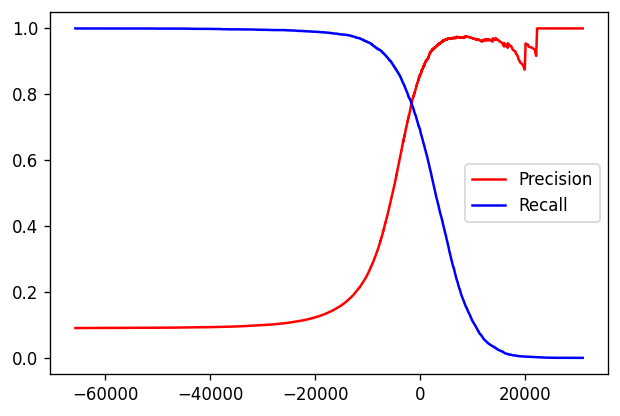

In [ ]:
plt.figure(dpi = 120)
plt.plot(thresholds, precisions[:-1], 'r')
plt.plot(thresholds, recalls[:-1], 'b')
plt.legend(['Precision', 'Recall'])
plt.show()

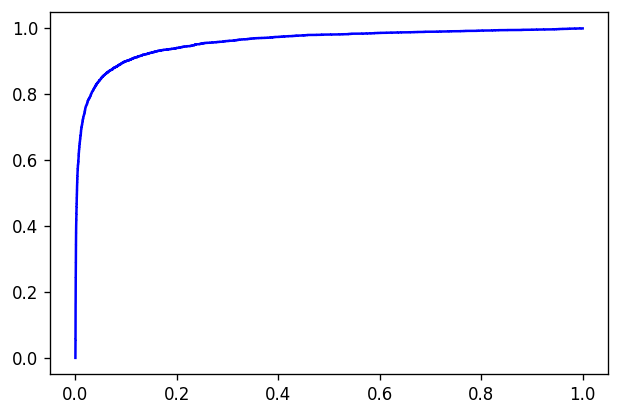

In [ ]:
plt.figure(dpi=120)
false_positive, true_positive, thresholds = roc_curve(Y_train_5, Y_scores)
plt.plot(false_positive,true_positive, 'b')
plt.show()

#We can plot the roc curve, which shows the true positive rate against the false positive rate 
#Higher we want the true positive rate (recall) to be, higher will be the false positive rate (lower precision)

In [ ]:
random_forst_cls = RandomForestClassifier()
Y_forest_probas = cross_val_predict(random_forst_cls, X_train_reshaped, Y_train_5, method = 'predict_proba', cv=3)

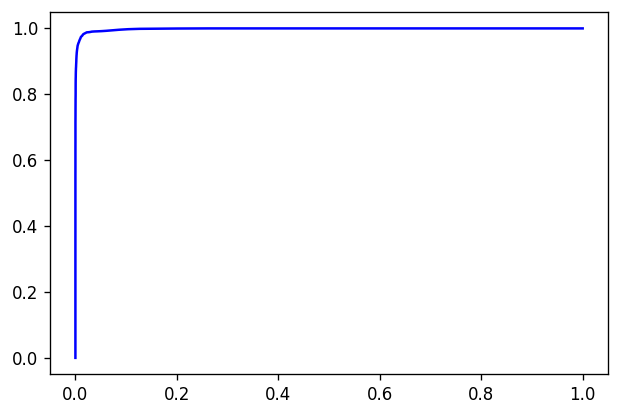

In [ ]:
Y_forest_scores = Y_forest_probas[:,1]
false_positive_forest, true_positive_forest, thresholds_forest = roc_curve(Y_train_5, Y_forest_scores)
plt.figure(dpi=120)
plt.plot(false_positive_forest, true_positive_forest, 'b')
plt.show()

#Same process for Random Forest Classifier, some additional code for calculating the scores

# 4. Multi Class Classification

In [ ]:
classifier_model_SGD.fit(X_train_reshaped, Y_train)

#We can directly train the SGD classifier for multi class classification

SGDClassifier()

In [ ]:
classifier_1v1 = OneVsOneClassifier(SGDClassifier())
classifier_1v1.fit(X_train_reshaped, Y_train)

#We can also train a OvO classifier that trains on combinations of the labels and then returns the class it is most confident of

OneVsOneClassifier(estimator=SGDClassifier())

In [ ]:
random_forst_cls.fit(X_train_reshaped, Y_train)

#Training a random forest classifier

RandomForestClassifier()

In [ ]:
cross_val_score(classifier_model_SGD, X_train_reshaped, Y_train, cv = 3, scoring='accuracy')

#Cross validation score, same as before for the SGD classifier 

array([0.83595, 0.8502 , 0.881  ])

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
cross_val_score(classifier_model_SGD, X_train_scaled, Y_train, cv = 3, scoring='accuracy')

#We will scale our data so that our model trains evenly and smoothly

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


array([0.90075, 0.89665, 0.9043 ])

In [ ]:
Y_train_pred_multi = cross_val_predict(classifier_model_SGD, X_train_scaled, Y_train,cv=3,method='predict')

#We will plot a confusion matrix for which we get the predictions over the training set

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
confusion_matrix = sklearn.metrics.confusion_matrix(Y_train, Y_train_pred_multi)

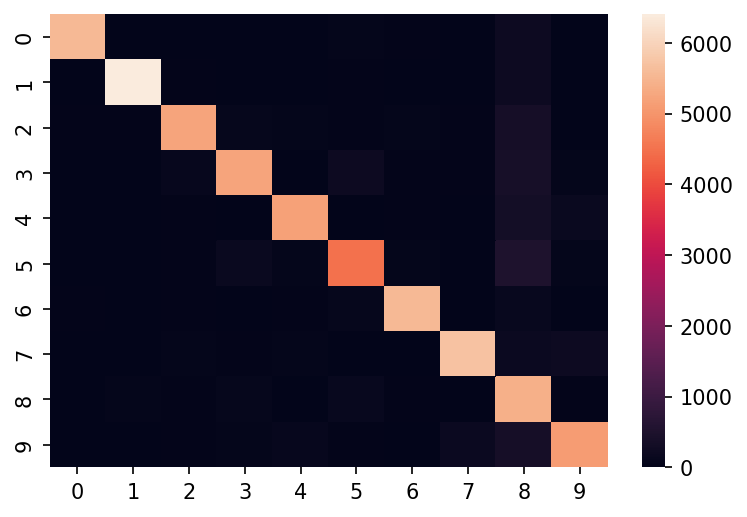

In [ ]:
plt.figure(dpi=150)
sns.heatmap(confusion_matrix)

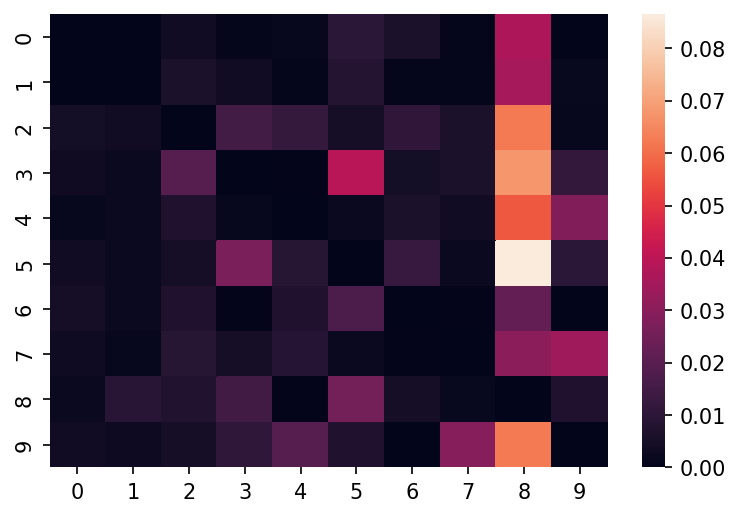

In [ ]:
confusion_matrix_rows_sum = confusion_matrix.sum(axis = 1)
error_matrix = confusion_matrix/confusion_matrix_rows_sum
np.fill_diagonal(error_matrix, 0)
plt.figure(dpi=150)
sns.heatmap(error_matrix)

#Since our training data might not be even, we wish to see the ratios of incorrect classifications
#We modify our heatmap accordingly and set the diagonal to 0
#We can see that errors are higher on 8, so it would be better to augment the training data with more 8s
#Errors are high on 3s and 5s

In [ ]:
f_no = 3
s_no = 5

In [ ]:
X_train_f_no = []
X_train_s_no = [] 
X_train_f_no_right = []
X_train_s_no_right = []

for j,val in enumerate(Y_train):
  if val == Y_train_pred_multi[j] and val == f_no:
    X_train_f_no.append(X_train_reshaped[j])
  elif val == Y_train_pred_multi[j] and val == s_no:
    X_train_s_no.append(X_train_reshaped[j])
  elif Y_train_pred_multi[j] == s_no and val == f_no:
    X_train_f_no_right.append(X_train_reshaped[j])
  elif Y_train_pred_multi[j] == f_no and val == s_no:
    X_train_s_no_right.append(X_train_reshaped[j])

X_train_3s_correct = np.asarray(X_train_f_no)
X_train_5s_correct = np.asarray(X_train_s_no)

X_train_3s_wrong = np.asarray(X_train_f_no_right)
X_train_5s_wrong = np.asarray(X_train_s_no_right)

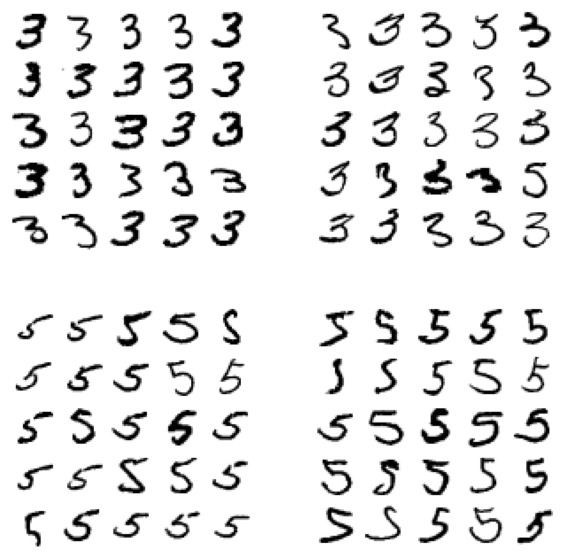

In [ ]:
color_map = plt.cm.get_cmap('gray')
color_map_reversed = color_map.reversed()
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(np.concatenate((X_train_3s_correct[:5].reshape(140,28),X_train_3s_correct[5:10].reshape(140,28),X_train_3s_correct[10:15].reshape(140,28),
                          X_train_3s_correct[15:20].reshape(140,28),X_train_3s_correct[20:25].reshape(140,28)),axis=1),cmap = color_map_reversed)
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(np.concatenate((X_train_3s_wrong[:5].reshape(140,28),X_train_3s_wrong[5:10].reshape(140,28),X_train_3s_wrong[10:15].reshape(140,28),
                          X_train_3s_wrong[15:20].reshape(140,28),X_train_3s_wrong[20:25].reshape(140,28)),axis=1),cmap = color_map_reversed)
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(np.concatenate((X_train_5s_correct[:5].reshape(140,28),X_train_5s_correct[5:10].reshape(140,28),X_train_5s_correct[10:15].reshape(140,28),
                          X_train_5s_correct[15:20].reshape(140,28),X_train_5s_correct[20:25].reshape(140,28)),axis=1),cmap = color_map_reversed)
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(np.concatenate((X_train_5s_wrong[:5].reshape(140,28),X_train_5s_wrong[5:10].reshape(140,28),X_train_5s_wrong[10:15].reshape(140,28),
                          X_train_5s_wrong[15:20].reshape(140,28),X_train_5s_wrong[20:25].reshape(140,28)),axis=1),cmap = color_map_reversed)
plt.axis('off')
plt.show()

#The above blocks of code help us to identify the different types of 3s and 5s 
#The first block creates 4 arrays, the 3s that are classified correctly, 3s classified incorrectly as 5s
#5s classified correctly and 5s classified incorrectly as 3s
#The second block uses matplotlib subplots to plot these images

# 5. Multilabel & MultiOutput Classification

In [ ]:
Y_train_multi_label = np.zeros([60000,2])
Y_train_large = (Y_train >= 7)
Y_train_odd = (Y_train %2 ==1)
Y_train_multi_label[:,0] = Y_train_large
Y_train_multi_label[:,1] = Y_train_odd

#We create training labels with two different features, greater than 7 and odd

In [ ]:
K_neighbour_classifier = KNeighborsClassifier()
K_neighbour_classifier.fit(X_train_reshaped, Y_train_multi_label)

#We train the KNeighborsClassifier to predict on this

KNeighborsClassifier()

[[0. 1.]]


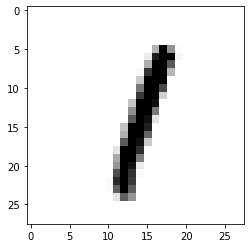

In [ ]:
color_map = plt.cm.get_cmap('gray')
color_map_reversed = color_map.reversed()
print(K_neighbour_classifier.predict([X_test_reshaped[5]]))
plt.imshow(X_test_reshaped[5].reshape(28,28), cmap=color_map_reversed)

#Testing the classifier with a test image

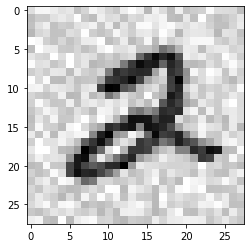

In [ ]:
noise_train = np.random.randint(0,100, size=(X_train_reshaped.shape))
noise_test= np.random.randint(0,100, size=(X_test_reshaped.shape))
X_train_reshaped_noise = X_train_reshaped + noise_train
X_test_reshaped_noise = X_test_reshaped + noise_test
plt.imshow(X_train_reshaped_noise[5].reshape(28,28), cmap=color_map_reversed)
Y_train_noise = X_train_reshaped

#For multioutput classification, we will train a model to take in noisy images and output the cleaned image
#We will add noise to the training and test data first
#An image with noise is plotted

In [ ]:
K_neighbour_classifier.fit(X_train_reshaped_noise, Y_train_noise)

#We will train this K_neighbour_classifier to transform these images

KNeighborsClassifier()

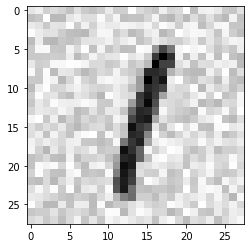

In [ ]:
plt.imshow(X_test_reshaped_noise[5].reshape(28,28),cmap= color_map_reversed)

#Testing the model with a test noisy image

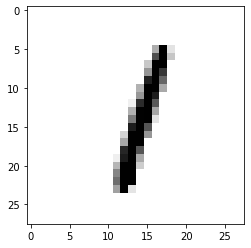

In [ ]:
cleaned_test_image = K_neighbour_classifier.predict([X_test_reshaped_noise[5]])
plt.imshow(cleaned_test_image.reshape(28,28),cmap=color_map_reversed)

#Clean output image